# Project: Pandas Plotting (Earnings Based On College Majors)

## Questions to address:
- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

## Tools:
- pandas plots:
  - scatter plots
  - histograms 
  - bar plots
  - multiple bar plots
  - hexbin
  - scatter_matrix
  - linregress

<br>

### load defaults

In [63]:
import pandas as pd
import re
import numpy as np

from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams

from functions import *

plt.rcParams.update({'axes.titlepad': 20, 'font.size': 12, 'axes.titlesize':20})

colors = [(0/255,107/255,164/255), (255/255, 128/255, 14/255), 'red', 'green']

<br>

## Dataset: Employment Stats for Different College Majors

In [2]:
recent_grads = pd.read_csv('./data/recent-grads.csv')
recent_grads.dropna(axis=0, inplace=True)
recent_grads.rename(columns={'Median': 'Median_salary'}, inplace=True)
print("reading done")

reading done


<br>

### Variables available:

In [32]:
for element in recent_grads.columns:
    print("%s | " % element, end='')

Rank | Major_code | Major | Total | Men | Women | Major_category | ShareWomen | Sample_size | Employed | Full_time | Part_time | Full_time_year_round | Unemployed | Unemployment_rate | Median_salary | P25th | P75th | College_jobs | Non_college_jobs | Low_wage_jobs | 

<br>

### DF snipet:

In [12]:
columns_list = ['Rank','Major_code','Major','Total','Men','Women','Major_category',
                'Sample_size','Employed','Full_time','Part_time', 'Median_salary']
display(recent_grads[columns_list].iloc[:3])

,Rank,Major_code,Major,Total,Men,Women,Major_category,Sample_size,Employed,Full_time,Part_time,Median_salary
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,36,1976,1849,270,110000
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,7,640,556,170,75000
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,3,648,558,133,73000


<br>

## Analysis:

Number of Majors: 172

Number of Majors per area of study:
Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Physical Sciences                      10
Social Science                          9
Agriculture & Natural Resources         9
Psychology & Social Work                9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64


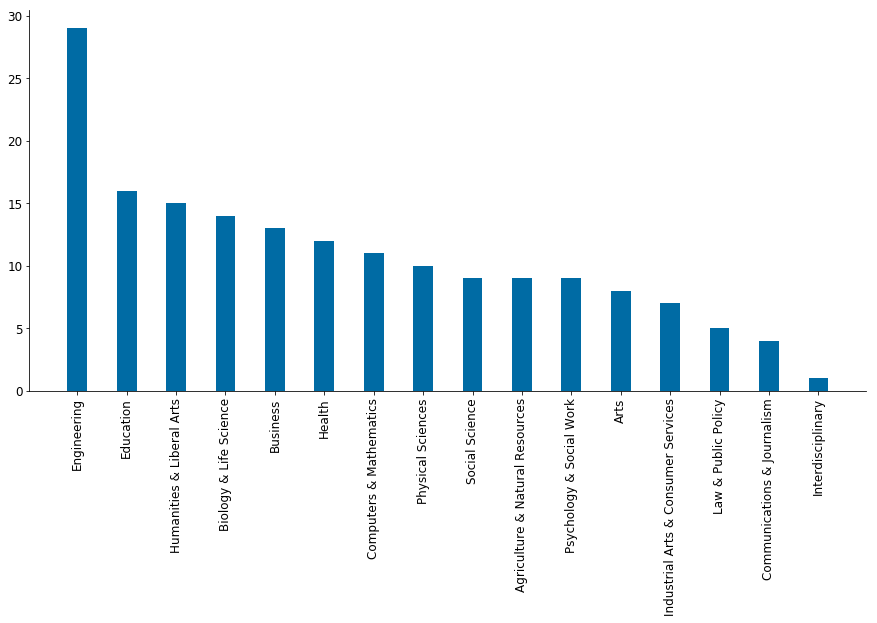

In [80]:
print("Number of Majors: %d\n" % len(recent_grads))

print("Number of Majors per area of study:")
print(recent_grads['Major_category'].value_counts())


table_data = recent_grads['Major_category'].value_counts()
columns = recent_grads['Major_category'].value_counts().index

fig = plt.figure(figsize=(15,7))
ax = plt.subplot()

bar_width = 0.4
index = np.arange(len(columns)) + 0.1
ax.bar(index, table_data, bar_width, color=colors[0])    
ax.set_xticks(index)
ax.set_xticklabels(columns, rotation=90)

for key, spine in ax.spines.items():
    if(key=='top' or key=='right'):
        spine.set_visible(False)

plt.show()

<br>

### Q1: Do students in more popular Majors make more money?

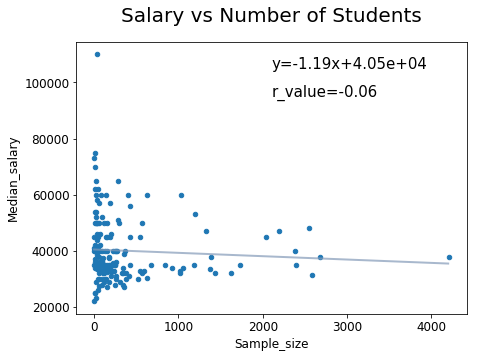

In [124]:
from scipy.stats import linregress

ax = recent_grads.plot(x='Sample_size', y='Median_salary', kind='scatter', 
                       title = 'Salary vs Number of Students', figsize=(7,5))

slope,intercept,r_value,p_value,stderr_slope = linregress(recent_grads["Sample_size"], recent_grads["Median_salary"])
xx = np.arange(0, max(recent_grads["Sample_size"]), 100.)
ax.plot(xx,xx*slope+intercept, color="#849AB8", linewidth=2, alpha=0.7)
ax.text(0.5, 0.9, 'y=%0.2fx+%0.2e' % (slope, intercept), fontsize=15, transform=ax.transAxes)
ax.text(0.5, 0.8, 'r_value=%0.2f' % (r_value), fontsize=15, transform=ax.transAxes)
plt.show()

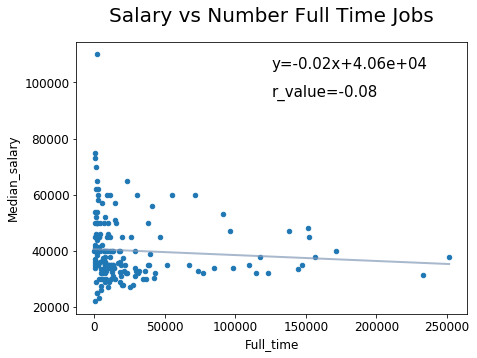

In [125]:
ax = recent_grads.plot(x='Full_time', y='Median_salary', kind='scatter', 
                       title = 'Salary vs Number Full Time Jobs', figsize=(7,5))

slope,intercept,r_value,p_value,stderr_slope = linregress(recent_grads["Full_time"], recent_grads["Median_salary"])
xx = np.arange(0, max(recent_grads["Full_time"]), 100.)
ax.plot(xx,xx*slope+intercept, color="#849AB8", linewidth=2, alpha=0.7)
ax.text(0.5, 0.9, 'y=%0.2fx+%0.2e' % (slope, intercept), fontsize=15, transform=ax.transAxes)
ax.text(0.5, 0.8, 'r_value=%0.2f' % (r_value), fontsize=15, transform=ax.transAxes)
plt.show()

In [47]:
max_salary_major = recent_grads['Median_salary']==recent_grads['Median_salary'].max()
print("Major with highest salary: %s\nHighest Salary: %d\nNumber of Students: %d" % 
      (recent_grads[max_salary_major]['Major'][0], recent_grads['Median_salary'].max(), 
       recent_grads[max_salary_major]['Total'][0]) )

Major with highest salary: PETROLEUM ENGINEERING
Highest Salary: 110000
Number of Students: 2339


- No, if anything there is an hint of an anti-correlation with some Majors with the lowest numbers of students and full time jobs having the highest salaries. However the correlation coefficient is very small

<br>

### Q2: Are majors with higher salary and higher employment rate Male or Female dominated?

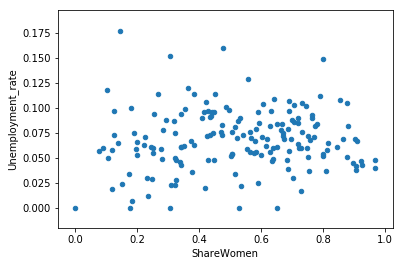

In [48]:
ax = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter') 
plt.show()

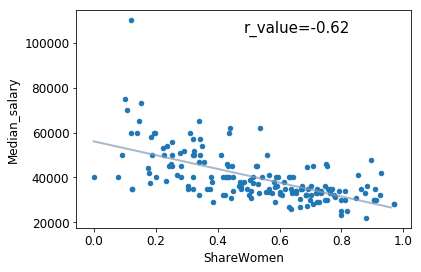

In [131]:
ax = recent_grads.plot(x='ShareWomen', y='Median_salary', kind='scatter') 

slope,intercept,r_value,p_value,stderr_slope = linregress(recent_grads["ShareWomen"], recent_grads["Median_salary"])
xx = np.arange(0, max(recent_grads["ShareWomen"]), max(recent_grads["ShareWomen"])/100.)
ax.plot(xx,xx*slope+intercept, color="#849AB8", linewidth=2, alpha=0.7)
ax.text(0.5, 0.9, 'r_value=%0.2f' % (r_value), fontsize=15, transform=ax.transAxes)
plt.show()

- No correlation between gender dominance and unemployment, Female dominated majors have the lowest salaries</b>

<br>

### Q3: Median Salary, Unemployment_rate and Percentage of Male vs Female

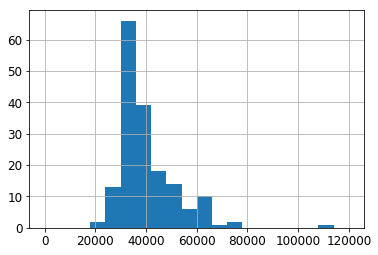

In [132]:
recent_grads['Median_salary'].hist(bins=20, range=(0,120000))
plt.show()

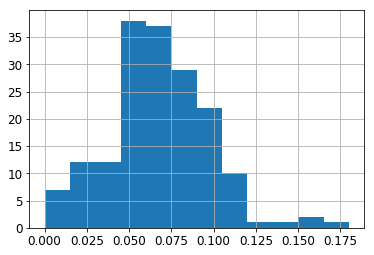

In [82]:
recent_grads['Unemployment_rate'].hist(bins=12, range=(0.,0.18))
plt.show()

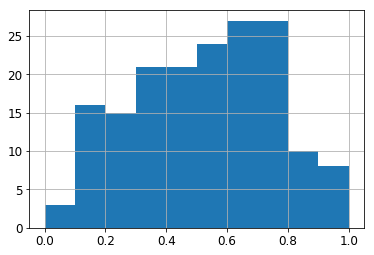

In [83]:
recent_grads['ShareWomen'].hist(bins=10, range=(0,1))
plt.show()

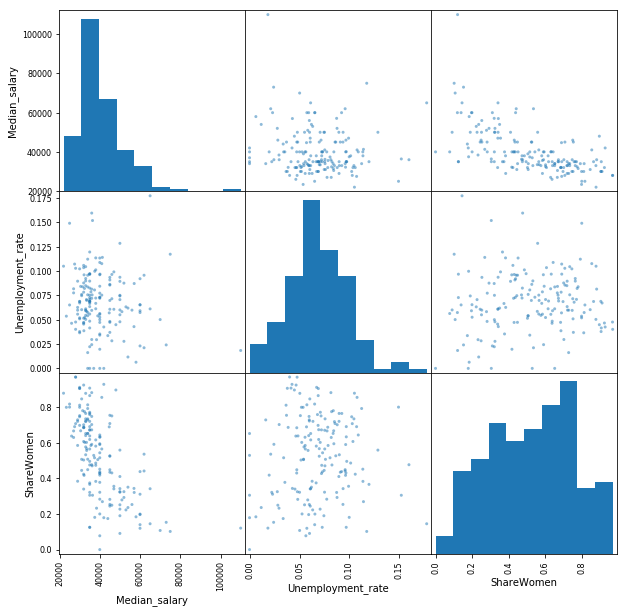

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Median_salary','Unemployment_rate','ShareWomen']], figsize=(10,10))
plt.show()

- Median Salary ~ 35000
- Unemployment rate is ~Gaussian distributed around ~7.5% with a sigma of ~5%
- there are more Female dominated majors (more above 0.5 ShareWomen)

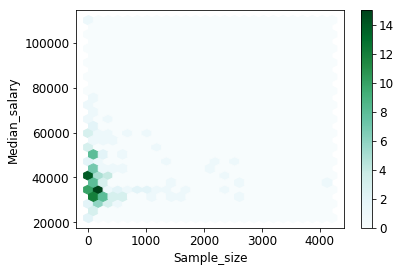

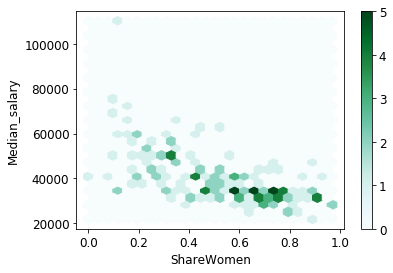

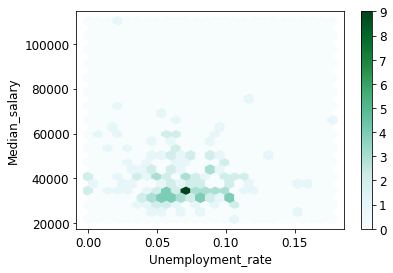

In [133]:
recent_grads.plot.hexbin(x='Sample_size', y='Median_salary', gridsize=25, sharex=False)
recent_grads.plot.hexbin(x='ShareWomen', y='Median_salary', gridsize=25, sharex=False)
recent_grads.plot.hexbin(x='Unemployment_rate', y='Median_salary', gridsize=25, sharex=False)
plt.show()

- one correlation: highest payed Majors have less females 
- hint of highest payed majors having less unemployment

<br>

### Q4: Look at the percentage of females in the top and bottom 10 majors in terms of salary

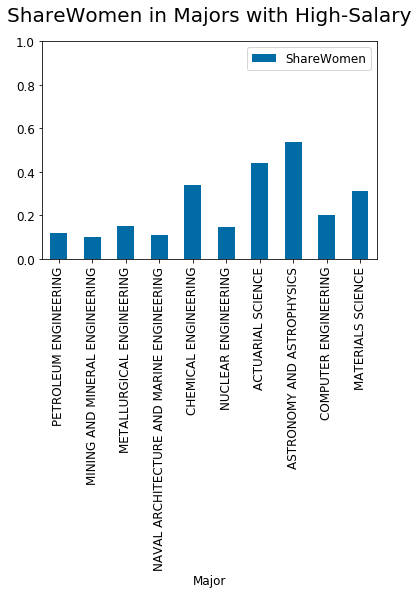

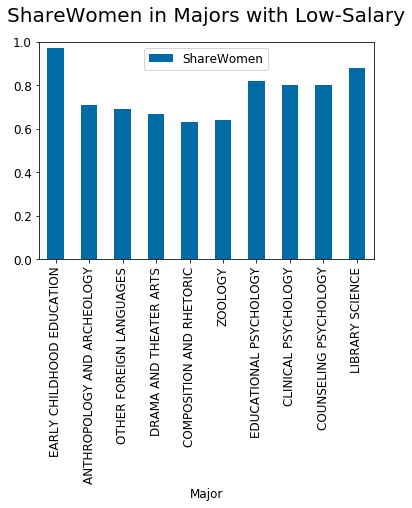

In [134]:
sorted_grads=recent_grads.sort_values('Median_salary', ascending=False)

title = 'ShareWomen in Majors with ' 
sorted_grads[:10].plot.bar(x='Major', y='ShareWomen', ylim=[0,1], title = title+'High-Salary', color=colors[0])
sorted_grads[-10:].plot.bar(x='Major', y='ShareWomen', ylim=[0,1], title = title+'Low-Salary', color=colors[0])

plt.show()

<br>

### Q5: Compare the number of Men and Women in the top and bottom 10 majors in terms of salary

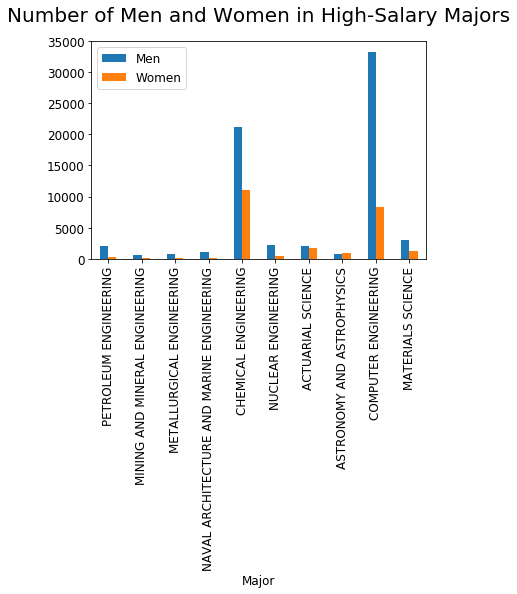

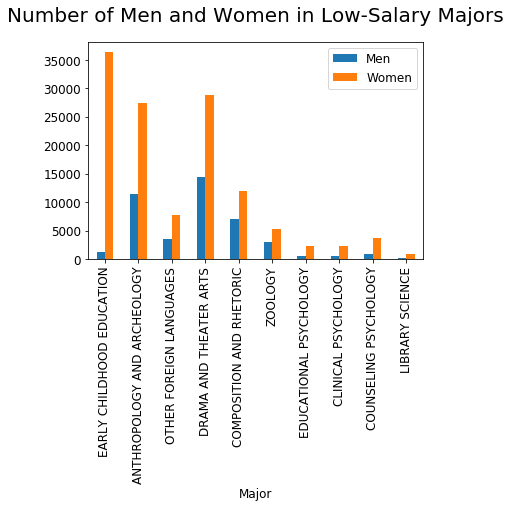

In [137]:
sorted_grads[:10].plot.bar(x='Major', y=['Men','Women'], title = 'Number of Men and Women in High-Salary Majors')
sorted_grads[-10:].plot.bar(x='Major', y=['Men','Women'], title = 'Number of Men and Women in Low-Salary Majors')
plt.show()

- It is clear that women predominate in low-salary majors

<br>

### Q6: Look at the unemployment rate in the top and bottom 10 majors in terms of salary

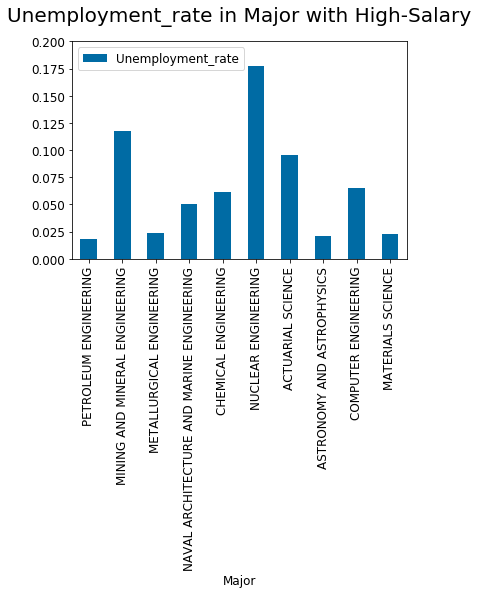

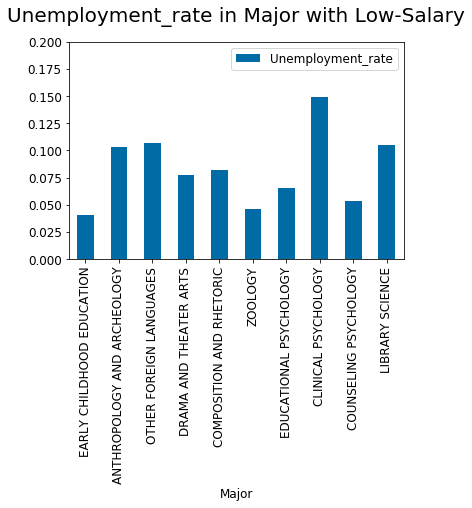

In [135]:
title = 'Unemployment rate in Major with '
sorted_grads[:10].plot.bar(x='Major', y='Unemployment_rate', ylim=[0,0.2], title = title+'High-Salary', color=colors[0])
sorted_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', ylim=[0,0.2], title = title+'Low-Salary', color=colors[0])
plt.show()

- Unemployment rates vary significantly within low and high-salary jobs, but tend to be lower in high-salary jobs.

<br>

### Q7: Look at outliers in the Median Salary and Unemployment Rates

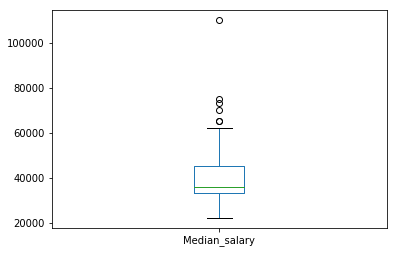

In [10]:
sorted_grads['Median_salary'].plot.box()
plt.show()

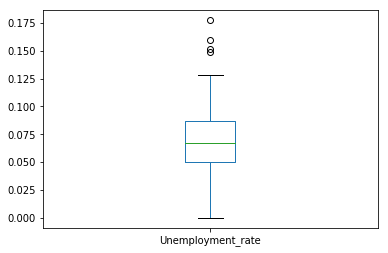

In [11]:
sorted_grads['Unemployment_rate'].plot.box()
plt.show()

- There are some significant outliers in the high-salary end of the Median Salary